<a href="https://www.kaggle.com/code/sunil199/99-accuracy-edible-mushroom-or-not?scriptVersionId=179917406" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-dataset/mushroom_cleaned.csv


# Import Packages

In [2]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

# Read Dataset

In [3]:
dataset=pd.read_csv('/kaggle/input/mushroom-dataset/mushroom_cleaned.csv')

## print shape of dataset with rows and columns
print(dataset.shape)

(54035, 9)


In [4]:
## print the top5 records
dataset.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [6]:
# Verifying data types and integrity
print("\nData Types:")
print(dataset.dtypes)

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(dataset.describe())


Data Types:
cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object

Descriptive Statistics:
       cap-diameter     cap-shape  gill-attachment    gill-color  \
count  54035.000000  54035.000000     54035.000000  54035.000000   
mean     567.257204      4.000315         2.142056      7.329509   
std      359.883763      2.160505         2.228821      3.200266   
min        0.000000      0.000000         0.000000      0.000000   
25%      289.000000      2.000000         0.000000      5.000000   
50%      525.000000      5.000000         1.000000      8.000000   
75%      781.000000      6.000000         4.000000     10.000000   
max     1891.000000      6.000000         6.000000     11.000000   

        stem-height    stem-width    stem-color        season         class  
count  54035.0

In [7]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# dataset['class']=le.fit_transform(dataset['class'])
# Recurred_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
# Recurred_name_mapping

In [8]:
#pd.DataFrame(Recurred_name_mapping.items())

In [9]:
dataset.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


# EDA
## Missing features

In [10]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

No Missing Feature

## Numerical Variables

In [11]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  9


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [12]:
dataset.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


## Temporal Variables(Eg: Datetime Variables)

In [13]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

[]

## Numerical variables are usually of 2 type
## 1. Discrete Features and Continous Features

In [14]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 6


In [15]:
discrete_feature

['cap-shape', 'gill-attachment', 'gill-color', 'stem-color', 'season', 'class']

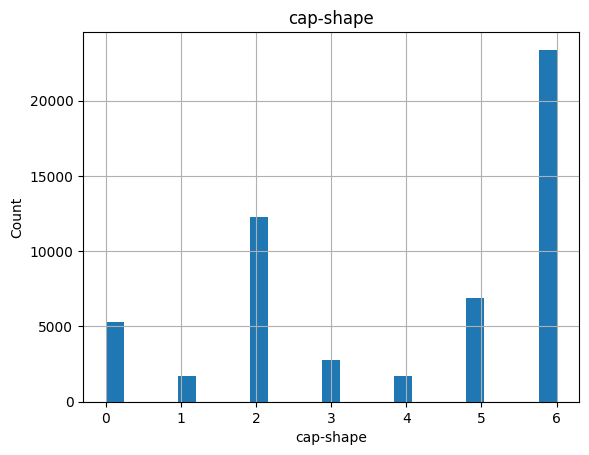

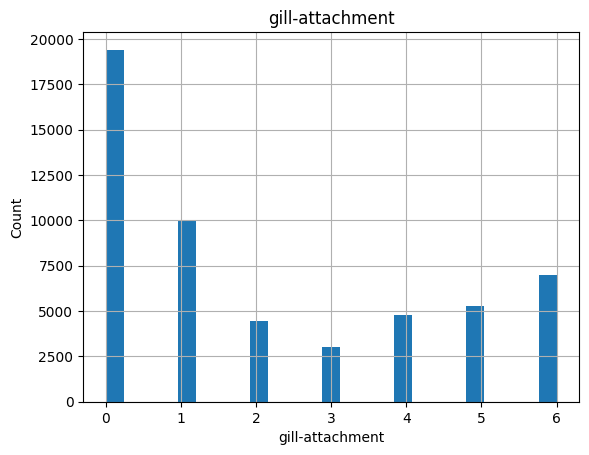

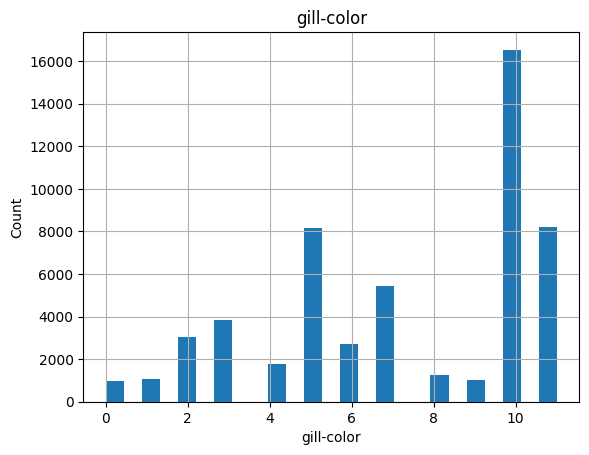

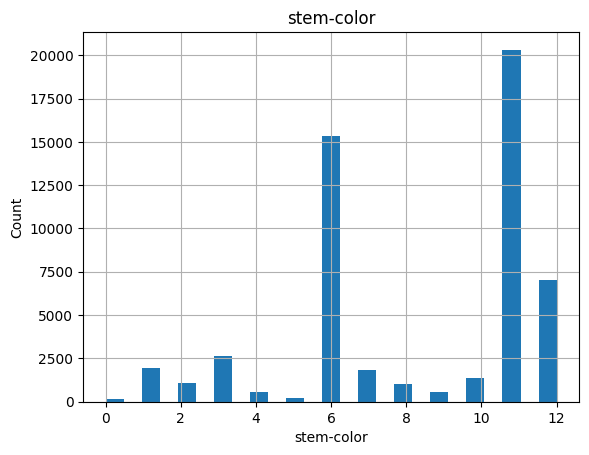

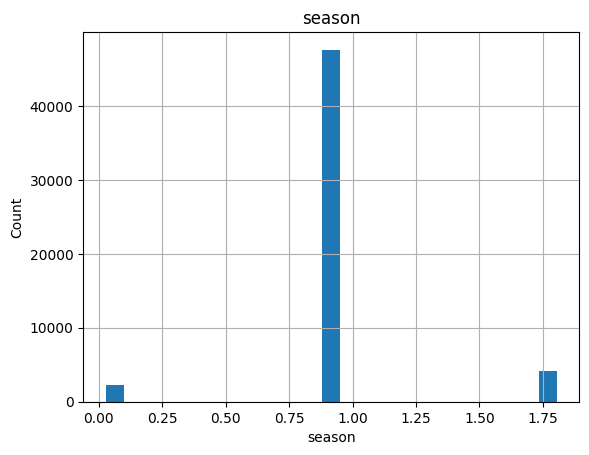

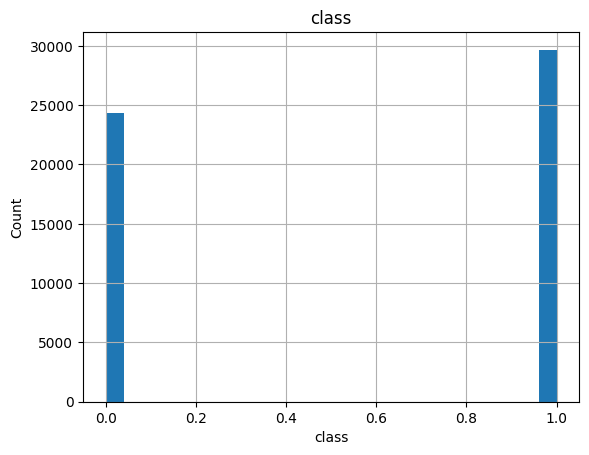

In [16]:
for feature in discrete_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [17]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 3


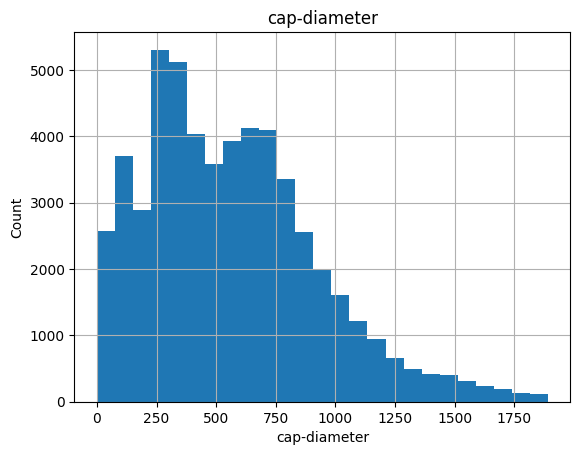

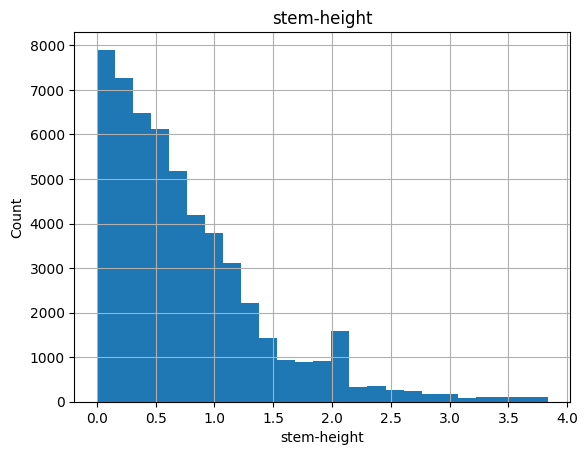

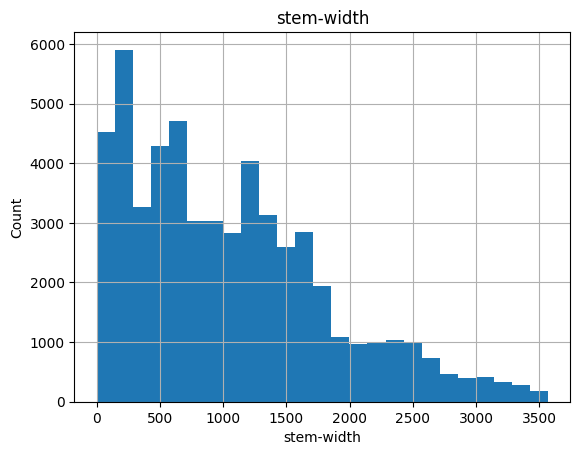

In [18]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Outliers In Numerical Feature

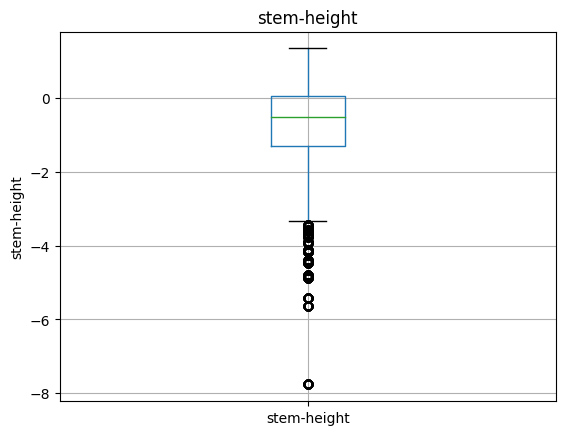

In [19]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

## Categorical Features

In [20]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

[]

# Feature Slection

In [21]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [22]:
## Capture the dependent feature
X=dataset.drop(['class'],axis=1)
y=dataset[['class']]

In [23]:
X.shape,y.shape

((54035, 8), (54035, 1))

In [24]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [25]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [26]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 8
selected features: 8
features with coefficients shrank to zero: 0


In [27]:
selected_feat

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season'],
      dtype='object')

In [28]:
X=X[selected_feat]

In [29]:
X.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
0,1372,2,2,10,3.807467,1545,11,1.804273
1,1461,2,2,10,3.807467,1557,11,1.804273
2,1371,2,2,10,3.612496,1566,11,1.804273
3,1261,6,2,10,3.787572,1566,11,1.804273
4,1305,6,2,10,3.711971,1464,11,0.943195


<Axes: >

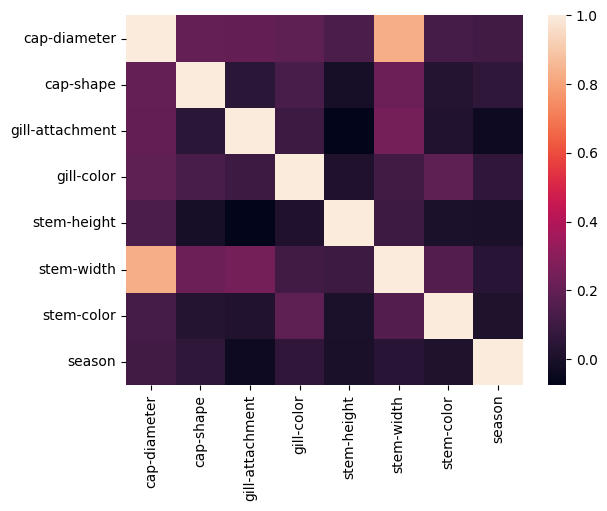

In [30]:
sns.heatmap(X.corr())

In [31]:
X.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
0,1372,2,2,10,3.807467,1545,11,1.804273
1,1461,2,2,10,3.807467,1557,11,1.804273
2,1371,2,2,10,3.612496,1566,11,1.804273
3,1261,6,2,10,3.787572,1566,11,1.804273
4,1305,6,2,10,3.711971,1464,11,0.943195


# Model Building

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [33]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)

/tmp/ipykernel_18/324425438.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier()

In [34]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

In [35]:
# using metrics module for accuracy calculation
from sklearn import metrics 
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL: 0.9899450990068472


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import (accuracy_score,classification_report,confusion_matrix,
                             precision_score,recall_score,f1_score,roc_auc_score,mean_squared_error,mean_absolute_error,r2_score)

In [37]:
models={
    "Logistic Regression":LogisticRegression(),
    "Decison Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "XGBoost":xgb.XGBClassifier(objective="binary:logistic", random_state=42),
    "GradientBoost":GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0),
    "AdaBoost":AdaBoostClassifier(n_estimators=100, random_state=0),
    "CatBoost":CatBoostClassifier(learning_rate= 0.1, depth=6, l2_leaf_reg= 3, iterations= 100)
    
}

In [38]:
!pip install dagshub
!pip install mlflow

  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.7/232.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 4.1 MB/s eta 0:00:00
  Created wheel for fusepy: filename=fusepy-3.0.1-py3-none-any.whl size=10487 sha256=1d90ba6f9522e81a08b26b4301599ba94035cd41672c47dcf3885aef071df3be
  Stored in directory: /root/.cache/pip/wheels/c0/18/f6/f0d6be9d0435e2677ce5cc758e91da50053dce

In [39]:
import dagshub
dagshub.init(repo_owner='SunilKumar-ugra', repo_name='EdibleMushroomPrediction', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=00b20f86-d671-4d71-9454-41cc1502c1f5&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=c4a1d6dcbcd7d175134af3506c0d69c85898976f9730dea62f0122c483f51d5e




Initialized MLflow to track repo "SunilKumar-ugra/EdibleMushroomPrediction"

Repository SunilKumar-ugra/EdibleMushroomPrediction initialized!

In [40]:
import mlflow
mlflow.set_tracking_uri("https://dagshub.com/SunilKumar-ugra/EdibleMushroomPrediction.mlflow")
mlflow.set_experiment("Edible  Mushroom or Not?")

<Experiment: artifact_location='mlflow-artifacts:/094264c3971a46bbbd3ef07f039efd4f', creation_time=1716748227015, experiment_id='0', last_update_time=1716748227015, lifecycle_stage='active', name='Edible  Mushroom or Not?', tags={'mlflow.sharedViewState.f929573f3bf33869cb47d74c838afd8d0ff0e29f39611ab32491f4fe705ed4ca': '{"searchFilter":"","orderByKey":"metrics.`Test '
                                                                                            'Accuracy`","orderByAsc":false,"startTime":"ALL","lifecycleFilter":"Active","datasetsFilter":[],"modelVersionFilter":"All '
                                                                                            'Runs","selectedColumns":["attributes.`Source`","attributes.`Models`","metrics.`Train '
                                                                                            'Accuracy`","metrics.`Test '
                                                                                            'Accuracy`"],"runsEx

In [41]:
def classification_performace_matric(actual, pred,avg):
        acc=accuracy_score(actual,pred)
        f1=f1_score(actual,pred,average=avg)
        precission=precision_score(actual,pred,average=avg)
        recall=recall_score(actual,pred,average=avg)
        return acc,f1,precission,recall

In [42]:
mlflow.sklearn.autolog(disable=True)

for i in range(len(list(models))):
    model=list(models.values())[i]
    model_name=list(models.keys())[i]
    
    with mlflow.start_run(run_name=str(model_name)):
        mlflow.set_tag("model_name", str(model_name))
        
        model.fit(X_train,y_train)
    
        y_train_pred=model.predict(X_train)
        y_test_pred=model.predict(X_test)
        
        
        #training   performance
        (trn_acc,trn_f1,trn_precission,trn_recall)=classification_performace_matric(y_train,y_train_pred,'weighted')
        
        #testing   performance
        (tst_acc,tst_f1,tst_precission,tst_recall)=classification_performace_matric(y_test,y_test_pred,'weighted')
        
        
        
        #train performance log
        
        mlflow.log_metric("Train Accuracy", trn_acc)
        mlflow.log_metric("Train F1 Score",trn_f1)
        mlflow.log_metric("Train Precision",trn_precission)
        mlflow.log_metric("Train Recall",trn_recall)
        
        # test performance log
        
        mlflow.log_metric("Test Accuracy", tst_acc)
        mlflow.log_metric("Test F1 Score",tst_f1)
        mlflow.log_metric("Test Precision",tst_precission)
        mlflow.log_metric("Test Recall",tst_recall)
        
        #Model log
        mlflow.sklearn.log_model(model, str(model_name)+"_model")

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to un

0:	learn: 0.6663579	total: 60.7ms	remaining: 6.01s
1:	learn: 0.6476158	total: 66.1ms	remaining: 3.24s
2:	learn: 0.6272247	total: 70.8ms	remaining: 2.29s
3:	learn: 0.6117117	total: 75.2ms	remaining: 1.8s
4:	learn: 0.5956386	total: 79.9ms	remaining: 1.52s
5:	learn: 0.5813076	total: 84.5ms	remaining: 1.32s
6:	learn: 0.5695421	total: 89ms	remaining: 1.18s
7:	learn: 0.5564741	total: 93.4ms	remaining: 1.07s
8:	learn: 0.5457149	total: 97.8ms	remaining: 989ms
9:	learn: 0.5345617	total: 103ms	remaining: 925ms
10:	learn: 0.5224283	total: 108ms	remaining: 871ms
11:	learn: 0.5132927	total: 112ms	remaining: 824ms
12:	learn: 0.5032093	total: 117ms	remaining: 782ms
13:	learn: 0.4964719	total: 121ms	remaining: 743ms
14:	learn: 0.4895072	total: 125ms	remaining: 711ms
15:	learn: 0.4823114	total: 130ms	remaining: 682ms
16:	learn: 0.4754844	total: 134ms	remaining: 657ms
17:	learn: 0.4700548	total: 139ms	remaining: 635ms
18:	learn: 0.4637485	total: 144ms	remaining: 613ms
19:	learn: 0.4586182	total: 149ms	r

/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


# Result

[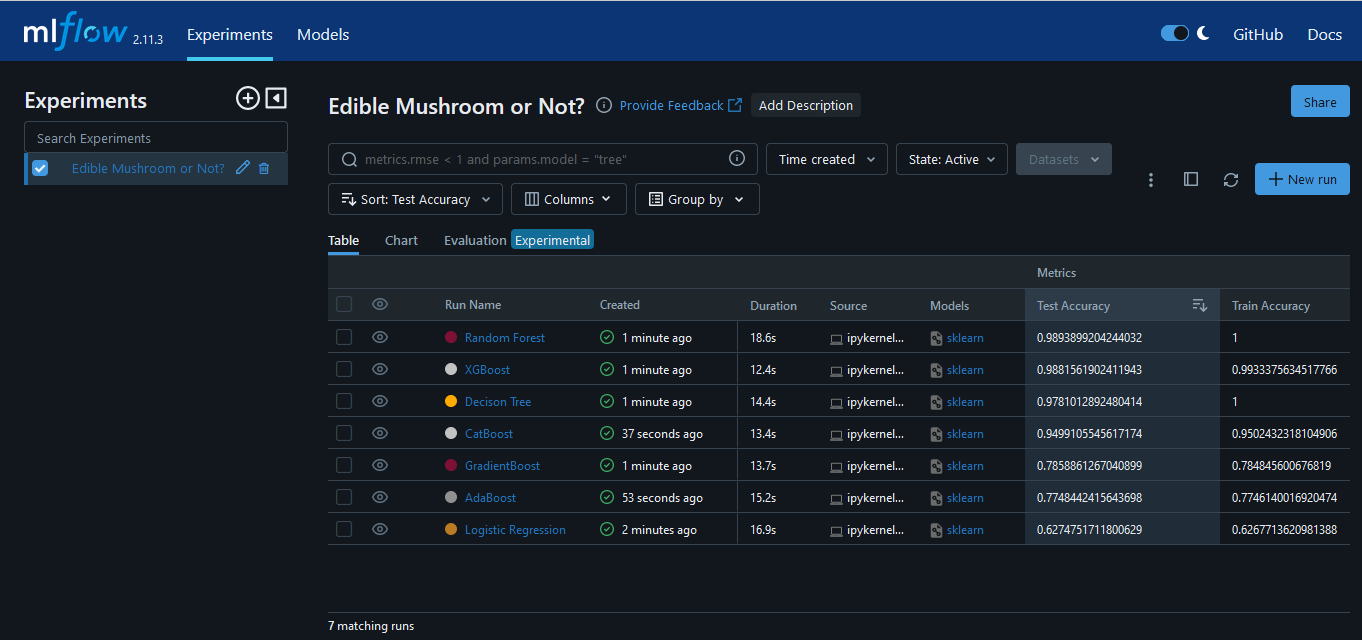](https://dagshub.com/SunilKumar-ugra/EdibleMushroomPrediction.mlflow/#/experiments/0?viewStateShareKey=f929573f3bf33869cb47d74c838afd8d0ff0e29f39611ab32491f4fe705ed4ca)